# Librerías necesarias

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from numpy import mean

from sklearn import preprocessing
from skfuzzy.cluster import cmeans
import matplotlib.pyplot as plt

# import sys
# sys.path.append("/Users/aitor/Library/Python/3.9/lib/python/site-packages")


# 1. Segmentación de clientes

In [19]:
clientes = pd.read_csv('csv/Mall_Customers.csv')
clientes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
le = preprocessing.LabelEncoder() 
clientes['Gender'] = le.fit_transform(clientes.Gender.values)
clientes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [21]:
X = clientes.to_numpy()

In [22]:
N = X.shape[0]
K = 4

SSE = []

for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0)
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

In [23]:
sigma = np.std(SSE)
mu = np.mean(SSE)

# 2 para distribución normal
# 3 para cualquier otra distribución
umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[2, 6, 7, 8, 10, 11, 30, 196, 197, 198, 199]


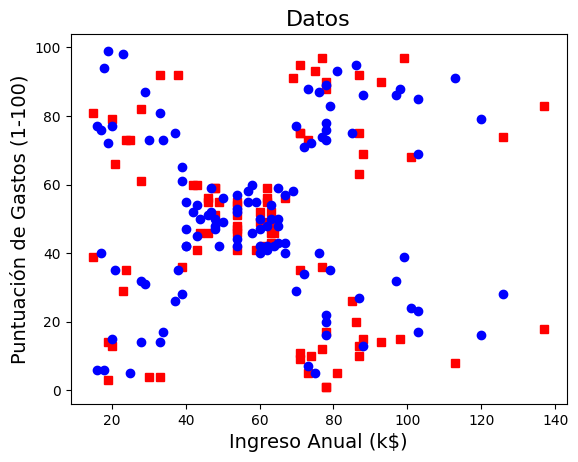

In [24]:
X = clientes[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Graficar los datos
plt.plot(X[clientes["Gender"]==1, 0], X[clientes["Gender"]==1, 1], 'rs') # 'rs' -> red square
plt.plot(X[clientes["Gender"]==0, 0], X[clientes["Gender"]==0, 1], 'bo') # 'bo' -> blue circulos
plt.title("Datos", fontsize=16) # titulo
plt.xlabel("Ingreso Anual (k$)", fontsize=14) # etiquetas del eje x
plt.ylabel("Puntuación de Gastos (1-100)", fontsize=14) # etiquetas del eje y
plt.show()

In [25]:
# inicializar kmeans
# n_cluster -> numero de grupos ; random_state -> semilla
kmeans = KMeans(n_clusters=2, random_state=10)

# entrenamiento (ajustar el modelo)
kmeans.fit(X)

# prediccion -> devuelve array con el número de grupo al que pretenece cada dato
pred = kmeans.predict(X) # También puede utilizarse kmeans.fit_predict(X) realiza ambas etapas

# obtener centroides de los grupos
centroides = kmeans.cluster_centers_

print(centroides)

pred

[[37.28888889 50.28888889]
 [79.6        50.12727273]]


/Users/aitor/Desktop/sist_aprendizaje_aut.nosync/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_6839/3041540381.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


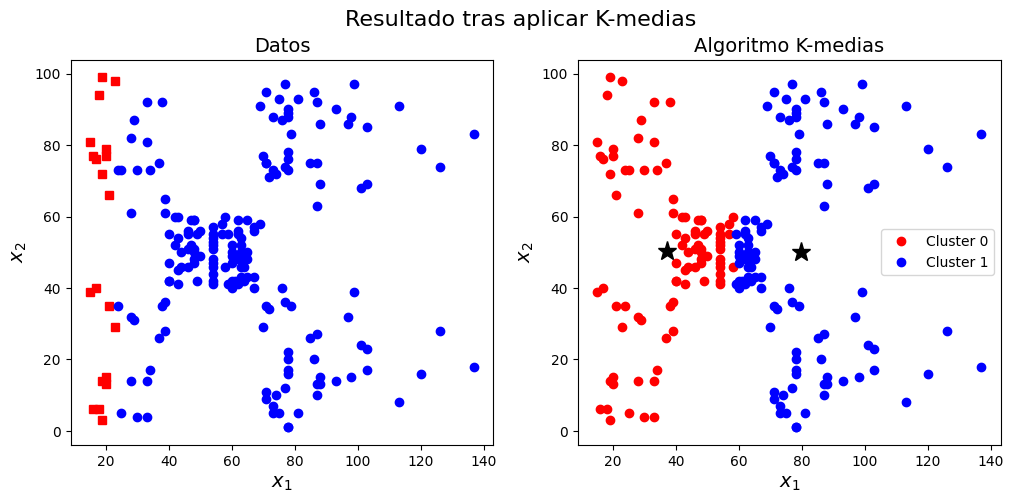

In [26]:
## Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

ax1.plot(X[:20, 0], X[:20, 1], 'rs')
ax1.plot(X[20:, 0], X[20:, 1], 'bo')
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0") 
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1") 
ax2.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14) # Dibujamos los centroides
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

In [27]:
def BIC(K, grupos, X):
    filas, columnas = X.shape

    N = filas
    P = columnas

    sumatorio = 0.0
    var_estimada = 0.0

    for k in range(0, K):
        suma_var_estimada = 0.0
        nk =sum(grupos==k)
        for j in range(0, P):
            sigma_j = np.square(np.std(X[:, j]))
            sigma_jk = np.square(np.std(X[grupos==k, j]))
            suma_var_estimada += 0.5 * np.log(sigma_j + sigma_jk)
        
        sumatorio += -nk * suma_var_estimada
    
    homogeneidad = -2 * sumatorio

    coste_centroides = 2 * K * P * np.log(N)
    bic = homogeneidad + coste_centroides
    return bic

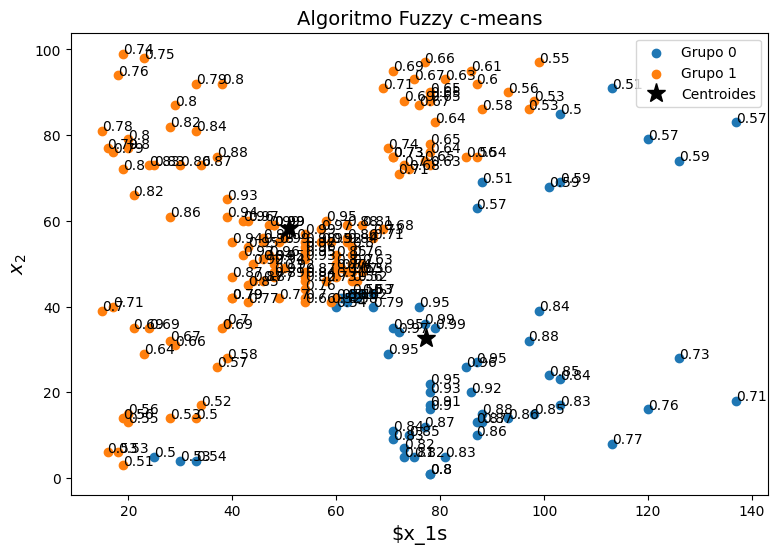

In [29]:
K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

centroides, U, u0, d, jm, p, fpc = cmeans(X.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - centroides: Centroides
# - U: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración # - jm: Historico del valor de la función objetivo # - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los indices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

# representación

plt.figure(figsize= (9, 6))

for k in range (0, K):
    plt.scatter(X[grupos==k, 0], X[grupos==k, 1], label="Grupo {}".format(k))

for i, maxU_i in enumerate (np.round(maxU, 2)):
    plt.annotate (maxU_i, (X[i, 0], X[i, 1]))

# Dibujamos los centroides
plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides")

plt.title ("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel (r"$x_1s", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show ()

# 2. Segmentación de países

# 3. Segmentación de jugadores